In [1]:
%autosave 60

Autosaving every 60 seconds


In [4]:
import urllib.parse

url = urllib.parse.urljoin('http://sai.msu.ru/', 'index.html')
print(url)
urllib.parse.quote(' ы')

http://sai.msu.ru/index.html


'%20%D1%8B'

In [5]:
'ы'.encode()

b'\xd1\x8b'

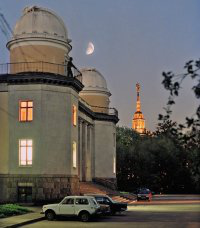

In [6]:
import urllib.request
from PIL import Image

with urllib.request.urlopen('http://sai.msu.ru/images/sai_yuferev200.jpg') as f:
    with Image.open(f) as img:
        display(img)

In [10]:
import requests

resp = requests.get('http://sai.msu.ru/abc/')
print(resp.status_code)
print(resp.text[:150])
resp.raise_for_status()

404
/1<html><head>
<meta http-equiv="Content-Type" content="text/html; charset=windows-1251">

<link rel="stylesheet" href="/style.css" type="text/css">
<


HTTPError: 404 Client Error: Not Found for url: http://sai.msu.ru/abc/

In [13]:
resp = requests.get('https://api.sunrise-sunset.org/json'
                    '?lat=36.7201600&lng=-4.4203400&date=today')
resp.raise_for_status()
j = resp.json()
display(j)
j['results']['solar_noon']

{'results': {'sunrise': '7:11:28 AM',
  'sunset': '5:01:55 PM',
  'solar_noon': '12:06:41 PM',
  'day_length': '09:50:27',
  'civil_twilight_begin': '6:43:09 AM',
  'civil_twilight_end': '5:30:13 PM',
  'nautical_twilight_begin': '6:11:09 AM',
  'nautical_twilight_end': '6:02:13 PM',
  'astronomical_twilight_begin': '5:39:57 AM',
  'astronomical_twilight_end': '6:33:26 PM'},
 'status': 'OK'}

'12:06:41 PM'

In [15]:
from pprint import pprint

n = 100
light_curve = [dict(t=t, m=0, err=0.1) for t in range(n)]
data = dict(light_curve=light_curve)
resp = requests.post('http://features.lc.snad.space/', json=data)
resp.raise_for_status()
features = resp.json()
pprint(features)

{'amplitude': 0.0,
 'beyond_1_std': 0.0,
 'beyond_2_std': 0.0,
 'chi2': 0.0,
 'cusum': 0.0,
 'eta': 0.0,
 'eta_e': 0.0,
 'inter_percentile_range_10': 0.0,
 'inter_percentile_range_25': 0.0,
 'kurtosis': 0.0,
 'linear_fit_reduced_chi2': 0.0,
 'linear_fit_slope': 0.0,
 'linear_fit_slope_sigma': 0.00034642748332099754,
 'linear_trend': 0.0,
 'linear_trend_sigma': 0.0,
 'magnitude_percentage_ratio_20_10': 0.0,
 'magnitude_percentage_ratio_40_5': 0.0,
 'maximum_slope': 0.0,
 'mean': 0.0,
 'median_absolute_deviation': 0.0,
 'median_buffer_range_percentage_5': 0.0,
 'percent_amplitude': 0.0,
 'percent_difference_magnitude_percentile_20': 0.0,
 'percent_difference_magnitude_percentile_5': 0.0,
 'period_0': 0.0,
 'period_1': 0.0,
 'period_2': 0.0,
 'period_s_to_n_0': 0.0,
 'period_s_to_n_1': 0.0,
 'period_s_to_n_2': 0.0,
 'periodogram_amplitude': 0.0,
 'periodogram_beyond_1_std': 0.0,
 'periodogram_beyond_2_std': 0.0,
 'periodogram_cusum': 0.0,
 'periodogram_eta': 0.0,
 'periodogram_inter_perce

In [18]:
from bs4 import BeautifulSoup
# import lxml

txt = requests.get('http://sai.msu.ru').text
soup = BeautifulSoup(txt)
print(soup.find(id='publ_month'))
pprint(soup.find_all(class_='menu'))

<a class="menu" href="" id="publ_month">Научные публикации за последний месяц по данным NASA ADS</a>
[<a class="menu" href="/news/index.html">Новости (архив)</a>,
 <a class="menu" href="/research/index.html">Исследования</a>,
 <a class="menu" href="/conference/index.html">Конференции ГАИШ</a>,
 <a class="menu" href="/conference/annconf/index.html">Объявления о сторонних конференциях и конкурсах</a>,
 <a class="menu" href="/seminars/index.html">Семинары ГАИШ</a>,
 <a class="menu" href="" id="publ_month">Научные публикации за последний месяц по данным NASA ADS</a>,
 <a class="menu" href="https://www.youtube.com/c/SternbergAstronomicalInstituteMSU">Канал на YouTube</a>,
 <a class="menu" href="/basa/index.html">Базы данных</a>,
 <a class="menu" href="http://www.sai.msu.ru/1/basa/efem.html">Служба естественных спутников планет</a>,
 <a class="menu" href="http://vo.astronet.ru/">Виртуальная обсерватория</a>,
 <a class="menu" href="http://rcsed.sai.msu.ru/">Каталог спектров галактик RCSED</a>

In [22]:
print(requests.get('http://127.0.0.1:8080/20.10.19/').text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Directory listing for /20.10.19/</title>
</head>
<body>
<h1>Directory listing for /20.10.19/</h1>
<hr>
<ul>
<li><a href="__pycache__/">__pycache__/</a></li>
<li><a href="mymodule.py">mymodule.py</a></li>
<li><a href="myscript.py">myscript.py</a></li>
<li><a href="numpy-submodules.html">numpy-submodules.html</a></li>
<li><a href="numpy-submodules.ipynb">numpy-submodules.ipynb</a></li>
<li><a href="other_script.py">other_script.py</a></li>
</ul>
<hr>
</body>
</html>



In [23]:
print(requests.get('http://127.0.0.1:8080/').text)

Hello world!


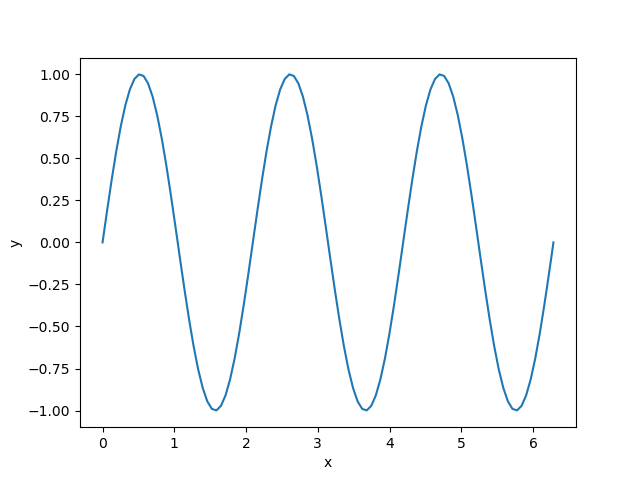

In [30]:
from io import BytesIO

resp = requests.get('http://127.0.0.1:8080/sin/3.png')
b = BytesIO(resp.content)
with Image.open(b) as img:
    display(img)

In [31]:
# aiohttp

In [ ]:
async await